## DNN to predict the Tensile strength just using non-destructive tests

## 1. Pre-processing of the data

### Importing the relevant libraries

In [20]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Charging data

In [21]:
df=pd.read_csv('Data_art.csv') #Your data needs to have a .csv format
df.head()

,UPV,Er,Rf,Cs,Ts
0,4122.510200,8.833761,3188.653436,44.587180,32.398378
1,4127.860628,8.740407,3191.473926,43.947959,32.463288
2,4146.025672,8.813029,3196.499943,45.557562,32.493602
3,4121.469341,8.754859,3195.660763,45.029495,32.581153
4,4146.911326,8.669786,3189.378654,44.608165,32.392479


In [22]:
#Generating a dataset copy to don't modify the original file
df_copy = df.copy()
del df_copy['Cs'] #Here, it is neccesary to delete the features that we don't need  

In [23]:
df_copy.shape #Checking the dataset shape 

(285, 4)

## Let's load the descriptive statistics of the data 

In [24]:
df_copy.describe()

,UPV,Er,Rf,Ts
count,285.000000,285.000000,285.000000,285.000000
mean,4282.719103,10.840003,3249.075683,39.014406
std,81.191052,1.553250,45.651534,6.636306
min,4121.469341,8.657062,3181.172833,32.377196
25%,4218.924926,9.230135,3211.377126,33.568478
50%,4297.701805,10.723643,3237.264470,36.959033
75%,4352.739553,12.104689,3286.986430,39.925414
max,4425.378991,13.346382,3349.411865,51.448289


## 2. Displaying data type and histograms

In [25]:
df_copy.dtypes

UPV    float64
Er     float64
Rf     float64
Ts     float64
dtype: object

Text(0.5, 0, 'Er(ohm-m)')

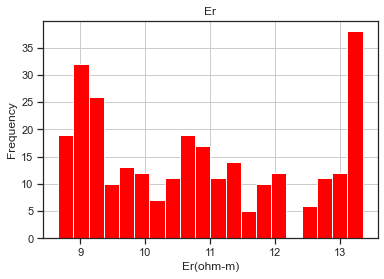

In [26]:
sns.set(style="ticks")
df_copy.hist(column='Er', bins=20,color='red')
plt.ylabel('Frequency')
plt.xlabel('Er(ohm-m)')
#plt.savefig('histograma_Er.png',dpi=1800)

Text(0.5, 0, 'Ts(kgf/cm²)')

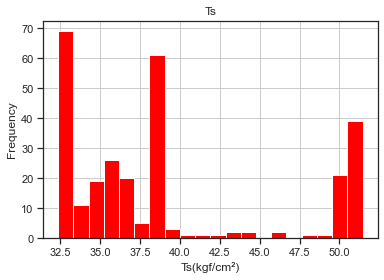

In [27]:
df_copy.hist(column='Ts', bins=20, color='red')
plt.ylabel('Frequency')
plt.xlabel('Ts(kgf/cm²)')
#plt.savefig('histograma_Ts.png',dpi=1800)

Text(0.5, 0, 'UPV(m/s)')

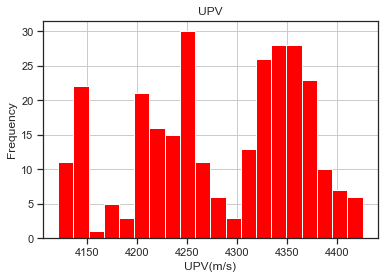

In [28]:
df_copy.hist(column='UPV', bins=20,color='red')
plt.ylabel('Frequency')
plt.xlabel('UPV(m/s)')
#plt.savefig('histograma_UPV.png',dpi=1800)

Text(0.5, 0, 'Rf(H)')

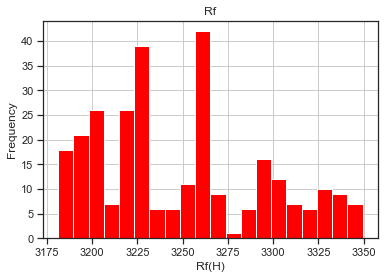

In [29]:
df_copy.hist(column='Rf', bins=20,color='red')
plt.ylabel('Frequency')
plt.xlabel('Rf(H)')
#plt.savefig('histograma_Rf.png',dpi=1800)

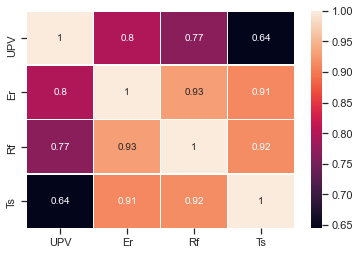

In [30]:
#Correlation matrix and its representation in heat maps
%matplotlib inline
sns.heatmap(df_copy.corr(),annot=True,linewidth=0.5); #<-If you are look going deeper visit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#plt.savefig('Correlation.png',dpi=1800)

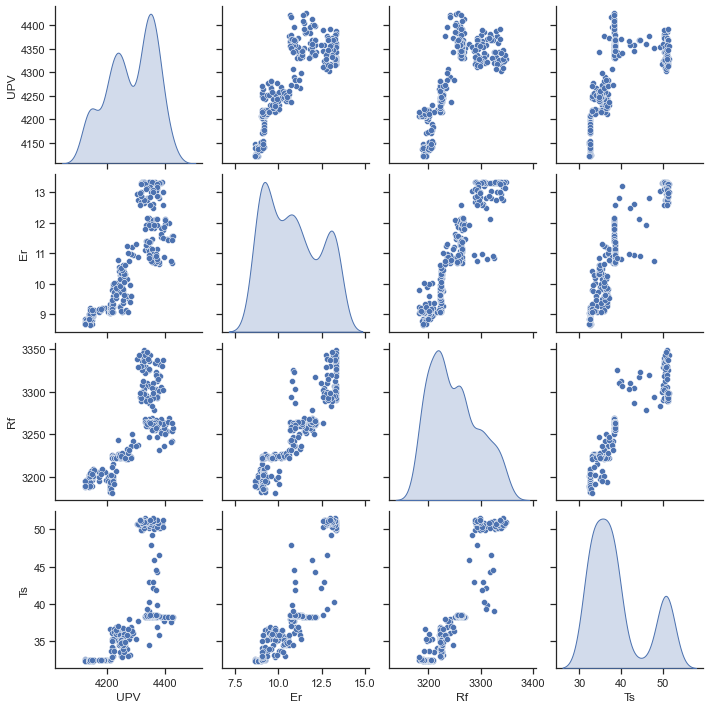

In [31]:
#Data distribution
sns.pairplot(df_copy,kind='scatter',diag_kind="kde")
# save image
# plt.savefig('Distribution.png',dpi=1800)

In [32]:
# It's neccesary create a copy of our file and loading it as .txt file
df_copy=df_copy.to_csv('df_copy.csv', header=False, index=False)

In [33]:
df_copy = np.loadtxt('df_copy.csv',delimiter=',')

In [34]:
# Here we define the input data of the dataset
X = df_copy[:,0:-1]
X.shape

(285, 3)

In [35]:
# The targets are in the last column. That's how datasets are conventionally organized.
y = df_copy[:,-1]
y.shape

(285,)

## Standardize the inputs

In [36]:
# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs, as we explained in one of the lectures.
# At the end of the business case, you can try to run the algorithm WITHOUT this line of code. 
# The result will be interesting.
scaled_inputs = preprocessing.scale(X);
scaled_outputs= preprocessing.scale(y);

## Shuffling the data and splitting into train and test

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_inputs, scaled_outputs, test_size=0.2, random_state=103)

### Format change to be used  in the Tensorflow framework. (.npz)

In [38]:
# Save the two datasets in *.npz.
# You will see that it is extremely valuable to name them in such a coherent way!
np.savez('Data_train', inputs=X_train, targets=y_train);
np.savez('Data_test', inputs=X_test, targets=y_test);